In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
test = yf.download(['TSLA', 'FB'], start='2018-01-01', end='2019-12-31')
test.head()

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
                    FB       TSLA          FB       TSLA          FB   
Date                                                                   
2018-01-02  181.419998  64.106003  181.419998  64.106003  181.580002   
2018-01-03  184.669998  63.450001  184.669998  63.450001  184.779999   
2018-01-04  184.330002  62.924000  184.330002  62.924000  186.210007   
2018-01-05  186.850006  63.316002  186.850006  63.316002  186.899994   
2018-01-08  188.279999  67.281998  188.279999  67.281998  188.899994   

                              Low                   Open               Volume  \
                 TSLA          FB       TSLA          FB       TSLA        FB   
Date                                                                            
2018-01-02  64.421997  177.550003  62.200001  177.679993  62.400002  18151903   
2018-01-03  65.050003  181.330002  63.110001  181.880005  64.199997  16886563   
2018-01-04  63.709999  184.099594  61.136002  184.899994  62.574001  13880896   
2018-01-05  63.448002  184.929993  62.400002  185.589996  63.324001  13574535   
2018-01-08  67.403999  186.330002  63.099998  187.199997  63.200001  17994726   

                      
                TSLA  
Date                  
2018-01-02  21761000  
2018-01-03  22607500  
2018-01-04  49731500  
2018-01-05  22956000  
2018-01-08  49297000

In [ ]:
test = test['Adj Close']
test.head()

,FB,TSLA
Date,,
2018-01-02,181.419998,64.106003
2018-01-03,184.669998,63.450001
2018-01-04,184.330002,62.924000
2018-01-05,186.850006,63.316002
2018-01-08,188.279999,67.281998


In [ ]:
# Log of percentage change
tesla = test['TSLA'].pct_change().apply(lambda x: np.log(1+x))
tesla.head()

Date
2018-01-02         NaN
2018-01-03   -0.010286
2018-01-04   -0.008325
2018-01-05    0.006210
2018-01-08    0.060755
Name: TSLA, dtype: float64

In [ ]:
var_tesla = tesla.var()
var_tesla

0.001150535926590615

In [ ]:
# Log of Percentage change for Facebook
fb = test['FB'].pct_change().apply(lambda x: np.log(1+x))
fb.head()

Date
2018-01-02         NaN
2018-01-03    0.017756
2018-01-04   -0.001843
2018-01-05    0.013579
2018-01-08    0.007624
Name: FB, dtype: float64

In [ ]:
var_fb = fb.var()
var_fb

0.0004578574227930451

In [ ]:
tesla_vol = np.sqrt(var_tesla * 250)
fb_vol = np.sqrt(var_fb * 250)
tesla_vol, fb_vol

(0.5363151887161632, 0.33832581293519604)

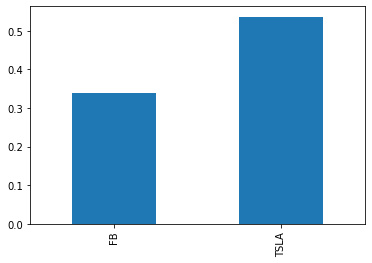

In [ ]:
# Volatility of both stocks
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

In [ ]:
# Log of Percentage change
test1 = test.pct_change().apply(lambda x: np.log(1+x))
test1.head()

,FB,TSLA
Date,,
2018-01-02,NaN,NaN
2018-01-03,0.017756,-0.010286
2018-01-04,-0.001843,-0.008325
2018-01-05,0.013579,0.006210
2018-01-08,0.007624,0.060755


In [ ]:
test1['TSLA'].cov(test1['FB'])

0.00018291711671464828

In [ ]:
test1['TSLA'].corr(test1['FB'])

0.25202238962557705

In [ ]:
test2 = test.pct_change().apply(lambda x: np.log(1+x))
test2.head()

,FB,TSLA
Date,,
2018-01-02,NaN,NaN
2018-01-03,0.017756,-0.010286
2018-01-04,-0.001843,-0.008325
2018-01-05,0.013579,0.006210
2018-01-08,0.007624,0.060755


In [ ]:
w = [0.2, 0.8]
e_r_ind = test2.mean()
e_r_ind

FB      0.000238
TSLA    0.000514
dtype: float64

In [ ]:
# Total expected return
e_r = (e_r_ind*w).sum()
e_r
#> .0003027691524101

0.0004589345039133348

In [ ]:
# Import data
df = yf.download(['AAPL', 'NKE', 'GOOGL', 'AMZN'], start='2015-01-01', end='2019-12-31')
df.head()

[*********************100%***********************]  4 of 4 completed


Adj Close                                      Close           \
                 AAPL     AMZN       GOOGL        NKE       AAPL     AMZN   
Date                                                                        
2015-01-02  24.678251  15.4260  529.549988  43.896648  27.332500  15.4260   
2015-01-05  23.983023  15.1095  519.460022  43.189903  26.562500  15.1095   
2015-01-06  23.985281  14.7645  506.640015  42.935841  26.565001  14.7645   
2015-01-07  24.321608  14.9210  505.149994  43.822739  26.937500  14.9210   
2015-01-08  25.256098  15.0230  506.910004  44.834347  27.972500  15.0230   

                                        High           ...         Low  \
                 GOOGL        NKE       AAPL     AMZN  ...       GOOGL   
Date                                                   ...               
2015-01-02  529.549988  47.514999  27.860001  15.7375  ...  527.880005   
2015-01-05  519.460022  46.750000  27.162500  15.4190  ...  517.750000   
2015-01-06  506.640015  46.474998  26.857500  15.1500  ...  505.549988   
2015-01-07  505.149994  47.435001  27.049999  15.0640  ...  503.649994   
2015-01-08  506.910004  48.529999  28.037500  15.1570  ...  495.019989   

                            Open                                     Volume  \
                  NKE       AAPL     AMZN       GOOGL        NKE       AAPL   
Date                                                                          
2015-01-02  47.055000  27.847500  15.6290  532.599976  48.275002  212818400   
2015-01-05  46.564999  27.072500  15.3505  527.150024  47.255001  257142000   
2015-01-06  46.035000  26.635000  15.1120  520.500000  46.945000  263188400   
2015-01-07  46.549999  26.799999  14.8750  510.950012  46.805000  160423600   
2015-01-08  47.810001  27.307501  15.0160  501.510010  47.830002  237458000   

                                        
                AMZN    GOOGL      NKE  
Date                                    
2015-01-02  55664000  1324000  4985800  
2015-01-05  55484000  2059100  6889200  
2015-01-06  70380000  2722800  7576000  
2015-01-07  52806000  2345900  7256000  
2015-01-08  61768000  3652700  5978200  

[5 rows x 24 columns]

In [ ]:
# Closing price
df = df['Adj Close']
df.head()


,AAPL,AMZN,GOOGL,NKE
Date,,,,
2015-01-02,24.678251,15.4260,529.549988,43.896648
2015-01-05,23.983023,15.1095,519.460022,43.189903
2015-01-06,23.985281,14.7645,506.640015,42.935841
2015-01-07,24.321608,14.9210,505.149994,43.822739
2015-01-08,25.256098,15.0230,506.910004,44.834347


In [ ]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,AAPL,AMZN,GOOGL,NKE
AAPL,0.000246,0.000142,0.000122,0.000084
AMZN,0.000142,0.000334,0.000176,0.000092
GOOGL,0.000122,0.000176,0.000222,0.000085
NKE,0.000084,0.000092,0.000085,0.000219


In [ ]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,AAPL,AMZN,GOOGL,NKE
AAPL,1.000000,0.496660,0.524875,0.360850
AMZN,0.496660,1.000000,0.647941,0.341554
GOOGL,0.524875,0.647941,1.000000,0.387464
NKE,0.360850,0.341554,0.387464,1.000000


In [ ]:
# Randomly weighted portfolio's variance
w = {'AAPL': 0.1, 'NKE': 0.2, 'GOOGL': 0.5, 'AMZN': 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.00016092119335415844

In [ ]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

AAPL     0.357854
AMZN     0.295745
GOOGL    0.155478
NKE      0.160666
dtype: float64

In [ ]:
# Portfolio returns
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er

0.20480655471913828

In [ ]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

AAPL     0.247871
AMZN     0.288770
GOOGL    0.235375
NKE      0.233916
dtype: float64

In [ ]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
AAPL,0.357854,0.247871
AMZN,0.295745,0.288770
GOOGL,0.155478,0.235375
NKE,0.160666,0.233916


In [ ]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [ ]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [ ]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [ ]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AAPL weight,AMZN weight,GOOGL weight,NKE weight
0,0.253903,0.191446,0.377095,0.147411,0.199280,0.276214
1,0.249518,0.190280,0.352834,0.149937,0.188170,0.309059
2,0.234986,0.204958,0.202154,0.270907,0.411862,0.115078
3,0.225440,0.190676,0.307126,0.035946,0.124020,0.532908
4,0.263591,0.205034,0.350483,0.261868,0.300483,0.087167


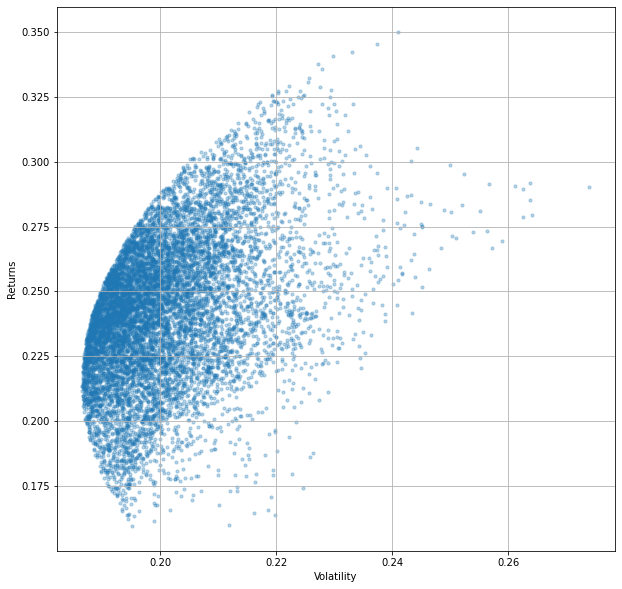

In [ ]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [ ]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.211816
Volatility      0.186599
AAPL weight     0.249056
AMZN weight     0.027257
GOOGL weight    0.316587
NKE weight      0.407100
Name: 7364, dtype: float64

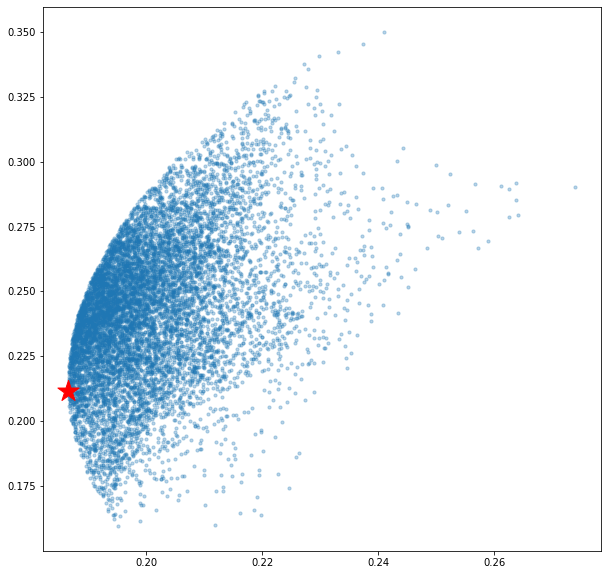

In [ ]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [ ]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.337752
Volatility      0.227266
AAPL weight     0.772210
AMZN weight     0.184068
GOOGL weight    0.009432
NKE weight      0.034290
Name: 7874, dtype: float64

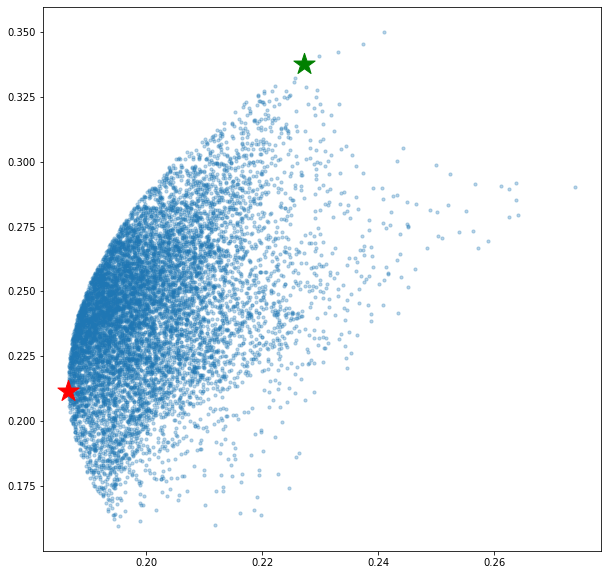

In [ ]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)